EDA - Komorebi  
SumAuto: grupo de ortales de anuncios para ventas y alquiler de vehiculos.
- Desarollar modelo preditivo para identificar el churn (Abandono) de lo anunciantes.
- Identificar patrones y caracteristicas que puedan influir en el abandono de clientes.
- Proponer ideas o desarrollos que aporten al analisis, como la retencion de clientes o segmentacion avanzada.

In [163]:
import os
import pandas as pd
import seaborn as sns

In [29]:
try:
    # Para archivos .py
    PATH = os.path.abspath(os.path.join(os.path.dirname(__file__),  ".."))
except NameError:
    # Para Jupyter Notebook
    PATH = os.path.abspath(os.path.join(os.getcwd(),  ".."))
PATH=PATH.replace("\\","/")

'd:\\Users\\maick\\Desktop\\Codigos\\Data-science-applied\\Komorebi'

In [ ]:
advertiser_withdrawals = pd.read_parquet(PATH+"/data/zrive_advertiser_withdrawals.parquet")
dim_advertiser = pd.read_parquet(PATH+"/data/zrive_dim_advertiser.parquet")
fct_montly_snapshot_advertiser = pd.read_parquet(PATH+"/data/zrive_fct_montly_snapshot_advertiser.parquet")

## dim_advertiser

In [135]:
dim_advertiser

,advertiser_zrive_id,province_id,updated_at,advertiser_province,advertiser_group_id,min_start_contrato_date,max_start_contrato_nuevo_date,contrato_churn_date
0,6732,1,2025-02-05 01:02:08,Álava,NaN,2025-01-24,None,2025-02-04
1,4841,2,2024-08-09 13:38:43,Albacete,133.0,2023-02-24,None,2023-06-03
2,2487,3,2025-01-13 17:41:02,Alicante,NaN,2024-10-02,2024-10-02,2025-01-13
3,1771,3,2024-11-07 13:26:50,Alicante,185.0,2021-11-15,None,2024-11-06
4,3396,3,2023-11-02 13:51:07,Alicante,NaN,2023-03-17,2023-03-17,2023-11-01
...,...,...,...,...,...,...,...,...
6829,6079,46,2025-02-19 14:13:04,Valencia,NaN,2024-11-19,2024-11-19,2025-03-31
6830,4775,47,2025-03-10 13:32:11,Valladolid,NaN,2024-12-12,2024-12-12,2025-03-31
6831,4712,48,2024-06-27 18:05:17,Vizcaya,41.0,2023-01-30,2023-01-30,2025-03-31
6832,5686,50,2025-03-17 17:29:04,Zaragoza,NaN,2024-02-07,2024-02-07,2025-03-31


In [136]:
dim_advertiser["advertiser_zrive_id"].nunique()

6834

<Axes: xlabel='advertiser_province'>

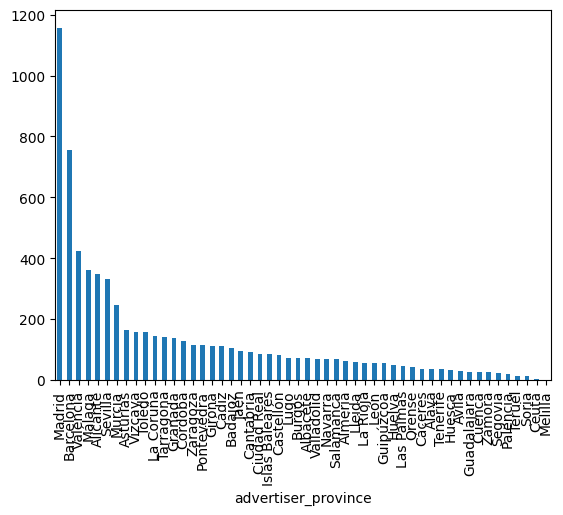

In [137]:
dim_advertiser["advertiser_province"].value_counts().plot(kind="bar")

In [157]:
dim_advertiser["contrato_churn_date"][dim_advertiser["contrato_churn_date"].notnull()].count() / dim_advertiser.shape[0]

0.527070529704419

In [134]:
date_churn_contrato = pd.to_datetime(dim_advertiser["contrato_churn_date"])
date_churn_contrato.value_counts().sort_index()

contrato_churn_date
2023-01-20      1
2023-01-31    239
2023-02-04      1
2023-02-08      1
2023-02-28    123
             ... 
2025-02-20      1
2025-02-28    197
2025-03-11      1
2025-03-20      1
2025-03-31     65
Name: count, Length: 104, dtype: int64

## fct_montly_snapshot_advertiser

In [109]:
fct_montly_snapshot_advertiser.columns

Index(['advertiser_zrive_id', 'period_int', 'monthly_published_ads',
       'monthly_unique_published_ads', 'monthly_contracted_ads',
       'monthly_leads', 'monthly_visits', 'monthly_oro_ads',
       'monthly_plata_ads', 'monthly_destacados_ads', 'monthly_pepitas_ads',
       'monthly_shows', 'monthly_total_phone_views', 'monthly_total_calls',
       'monthly_total_emails', 'monthly_total_invoice', 'monthly_unique_calls',
       'monthly_unique_emails', 'monthly_unique_leads', 'monthly_avg_ad_price',
       'monthly_distinct_ads', 'has_active_contract'],
      dtype='object')

In [ ]:
period_int_moths = fct_montly_snapshot_advertiser["period_int"].apply(lambda x:str(x)).apply(lambda x: x[0:4]+"-"+x[4:]+"-01")
fct_montly_snapshot_advertiser["period_int"]=pd.to_datetime(period_int_moths)

In [77]:
fct_montly_snapshot_advertiser.isnull().sum()

advertiser_zrive_id                 0
period_int                          0
monthly_published_ads               0
monthly_unique_published_ads        0
monthly_contracted_ads              0
monthly_leads                       0
monthly_visits                      0
monthly_oro_ads                     0
monthly_plata_ads                   0
monthly_destacados_ads              0
monthly_pepitas_ads                 0
monthly_shows                       0
monthly_total_phone_views           0
monthly_total_calls                 0
monthly_total_emails                0
monthly_total_invoice               0
monthly_unique_calls                0
monthly_unique_emails               0
monthly_unique_leads                0
monthly_avg_ad_price            22130
monthly_distinct_ads            23139
has_active_contract                 0
dtype: int64

In [79]:
(fct_montly_snapshot_advertiser["monthly_published_ads"] < fct_montly_snapshot_advertiser["monthly_contracted_ads"]).value_counts()
#There are 60k ads that are

True     55169
False    24958
Name: count, dtype: int64

<Axes: xlabel='period_int'>

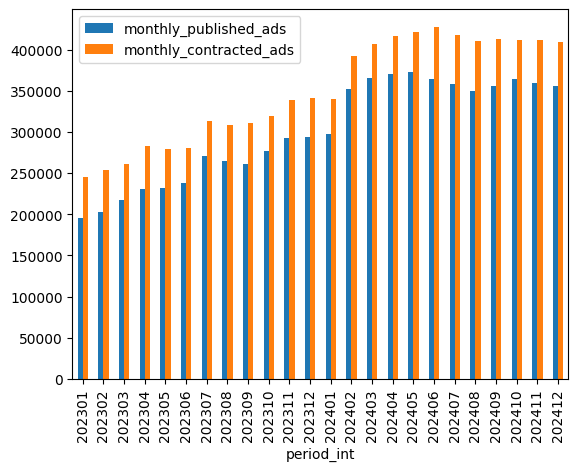

In [160]:
fct_montly_snapshot_advertiser.groupby("period_int").sum()[["monthly_published_ads","monthly_contracted_ads"]].plot(kind="bar")

In [62]:
#How many ads have each user
fct_montly_snapshot_advertiser.groupby("advertiser_zrive_id")["monthly_published_ads"].sum()

advertiser_zrive_id
1        169
2       1409
3         51
4       2530
5        440
        ... 
6800      43
6808     449
6822     166
6823     194
6824     200
Name: monthly_published_ads, Length: 6534, dtype: int64

<Axes: >

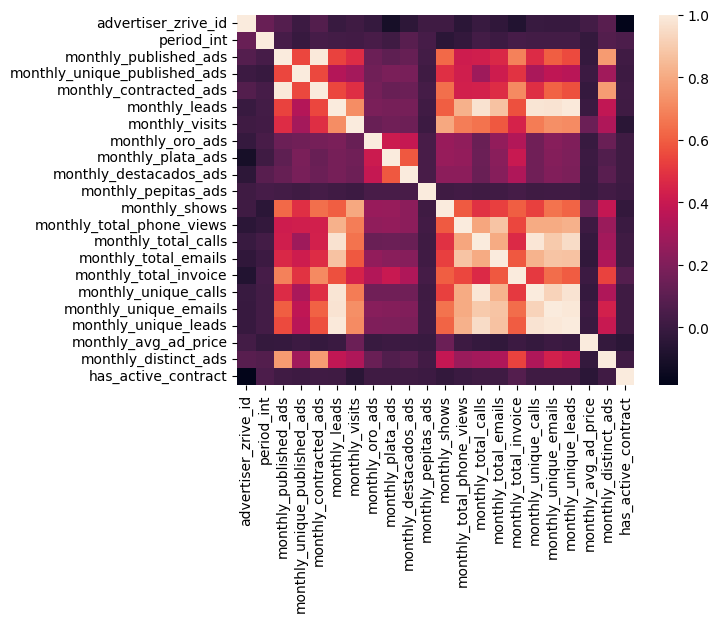

In [164]:
#¿Cuál es la correlación entre facturación mensual (monthly_total_invoice) y otras métricas como número de anuncios, visitas y leads?
fct_montly_snapshot_advertiser_matriz_corr = fct_montly_snapshot_advertiser.corr()
sns.heatmap(fct_montly_snapshot_advertiser_matriz_corr)

In [181]:
# 3. Distribución de antigüedad de los anunciantes
dim_advertiser["min_start_contrato_date"] = pd.to_datetime(dim_advertiser["min_start_contrato_date"])
dim_advertiser["antigüedad_años"] = (pd.to_datetime("today") - dim_advertiser["min_start_contrato_date"]).dt.days / 365
print("\nDistribución de antigüedad de los anunciantes:\n", dim_advertiser["antigüedad_años"].describe())


Distribución de antigüedad de los anunciantes:
 count    6834.000000
mean        2.303522
std         1.517068
min         0.032877
25%         1.167123
50%         2.210959
75%         3.010959
max        15.471233
Name: antigüedad_años, dtype: float64


In [182]:
# 4. Cantidad de anunciantes con más de un contrato
num_recurrentes = dim_advertiser["max_start_contrato_nuevo_date"].notna().sum()
print(f"\nAnunciantes que han tenido más de un contrato: {num_recurrentes}")


Anunciantes que han tenido más de un contrato: 4950


In [183]:
# 5. Tasa de anunciantes con contrato activo
tasa_activos = dim_advertiser["contrato_churn_date"].isna().mean()
print(f"\nTasa de anunciantes con contrato activo: {tasa_activos:.2%}")


Tasa de anunciantes con contrato activo: 47.29%


In [186]:
# 6. Evolución de anunciantes activos por mes
evolucion_activos = fct_montly_snapshot_advertiser.groupby("period_int")["has_active_contract"].sum()
print("\nEvolución de anunciantes activos por mes:\n", evolucion_activos)


Evolución de anunciantes activos por mes:
 period_int
202301    3437
202302    3257
202303    3323
202304    3297
202305    3263
202306    3273
202307    3241
202308    3122
202309    3067
202310    3031
202311    3096
202312    3123
202401    3106
202402    3181
202403    3241
202404    3301
202405    3316
202406    3407
202407    3347
202408    3285
202409    3307
202410    3283
202411    3297
202412    3414
Name: has_active_contract, dtype: int64


In [188]:
# 7. Relación entre anuncios contratados y publicados
relacion_anuncios = fct_montly_snapshot_advertiser[["monthly_contracted_ads", "monthly_published_ads"]].corr()
print("\nCorrelación entre anuncios contratados y publicados:\n", relacion_anuncios)


Correlación entre anuncios contratados y publicados:
                         monthly_contracted_ads  monthly_published_ads
monthly_contracted_ads                1.000000               0.991555
monthly_published_ads                 0.991555               1.000000


In [195]:
# 9. Distribución de motivos de baja
motivos_baja = advertiser_withdrawals["withdrawal_reason"].value_counts()
print("\nDistribución de motivos de baja:\n", motivos_baja)


Distribución de motivos de baja:
 withdrawal_reason
RESULTADOS                               5633
MOROSIDAD                                2874
RAZONES ECONOMICAS                       2264
Cambio de Contrato/propuesta/producto    2125
Upselling-cambio de contrato             1735
RATIO RESULTADO-INVERSION                1707
Cambio a Bundle Online                   1027
OTROS                                     879
FALTA DE USO/TIEMPO                       873
FALTA DE PRODUCTO                         585
CESE DE ACTIVIDAD                         408
FIN DE CONTRATO                           250
Reestructuración cuentas de grupo         179
CORONAVIRUS                               104
Incidencias de la web                      16
No acepta subida                           12
Baja Bundle AS24                            6
Desconocido                                 2
Name: count, dtype: int64
